In [26]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from alphatoe.interpretability import numpy
from alphatoe import plot, game, evals, interpretability
import pandas as pd
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
n_epochs = 1000
epochs = [x for x in range(n_epochs) if x % 10 == 0 or x == n_epochs - 1]

chkpts = [interpretability.load_model(
    f"../scripts/models/prob all 8 layer control with checkpoints-20250708-002411-epoch{x}"
) for x in epochs]

model = interpretability.load_model(
    "../scripts/models/prob all 8 layer control with checkpoints-20250708-002411"
)

data = pd.read_csv("../scripts/models/prob all 8 layer control with save_losses training data-20250712-115129.csv")

chkpts = [(x, y) for x, y in zip(epochs, chkpts)]

  0%|          | 0/101 [03:17<?, ?it/s]


In [28]:
data['epoch'] = data['Unnamed: 0']//50

In [39]:
data.head()

,Unnamed: 0,test losses,train losses,epoch
0,0,2.293837,2.293870,0
1,1,2.293426,2.293280,0
2,2,2.293015,2.293519,0
3,3,2.292604,2.292862,0
4,4,2.292193,2.292618,0


In [36]:

filtered_chkpts = [(epoch, model) for epoch, model in chkpts 
                   if (epoch % 100 == 0 or epoch == len(chkpts) - 1)]
num_games = 500
chkpt_evals = []
for epoch, model in tqdm(filtered_chkpts):
    result = evals.eval_model(evals.sample_games_batch(model, 1, num_games, batch_size = 2000))
    chkpt_evals.append((epoch, result))

  0%|          | 0/10 [00:00<?, ?it/s]
500it [00:00, 25675.53it/s]
 10%|█         | 1/10 [00:06<00:55,  6.12s/it]
500it [00:00, 10913.17it/s]
 20%|██        | 2/10 [00:12<00:48,  6.05s/it]
500it [00:00, 11689.88it/s]
 30%|███       | 3/10 [00:17<00:41,  5.90s/it]
500it [00:00, 11562.58it/s]
 40%|████      | 4/10 [00:23<00:35,  5.83s/it]
500it [00:00, 11632.62it/s]
 50%|█████     | 5/10 [00:29<00:28,  5.80s/it]
500it [00:00, 11468.75it/s]
 60%|██████    | 6/10 [00:35<00:23,  5.78s/it]
500it [00:00, 11492.13it/s]
 70%|███████   | 7/10 [00:40<00:17,  5.77s/it]
500it [00:00, 11136.82it/s]
 80%|████████  | 8/10 [00:46<00:11,  5.76s/it]
500it [00:00, 11344.97it/s]
 90%|█████████ | 9/10 [00:52<00:05,  5.75s/it]
500it [00:00, 11144.22it/s]
100%|██████████| 10/10 [00:58<00:00,  5.81s/it]


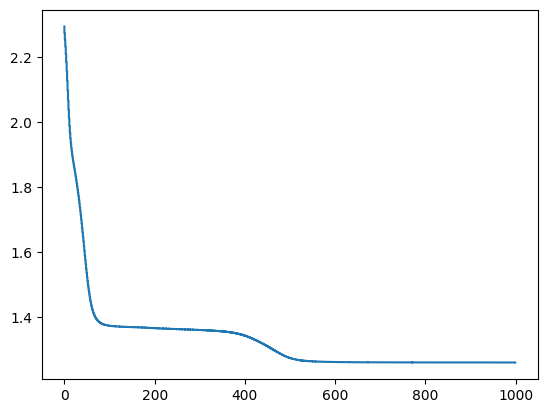

In [40]:
fig, ax = plt.subplots(1, 1)
ax.plot(data['epoch'], data['test losses'])

In [37]:
chkpt_evals

[(0,
  {'_check_played_repeat_moves': 0.996,
   '_check_played_after_player_victory': 0.02,
   '_check_played_after_draw_game': 0.0,
   'inappropriate_end_state': 0.414,
   '_check_if_illegal_moves': 1.0}),
 (100,
  {'_check_played_repeat_moves': 0.03,
   '_check_played_after_player_victory': 0.442,
   '_check_played_after_draw_game': 0.0,
   'inappropriate_end_state': 0.21,
   '_check_if_illegal_moves': 0.662}),
 (200,
  {'_check_played_repeat_moves': 0.004,
   '_check_played_after_player_victory': 0.448,
   '_check_played_after_draw_game': 0.0,
   'inappropriate_end_state': 0.246,
   '_check_if_illegal_moves': 0.696}),
 (300,
  {'_check_played_repeat_moves': 0.004,
   '_check_played_after_player_victory': 0.466,
   '_check_played_after_draw_game': 0.0,
   'inappropriate_end_state': 0.192,
   '_check_if_illegal_moves': 0.658}),
 (400,
  {'_check_played_repeat_moves': 0.006,
   '_check_played_after_player_victory': 0.368,
   '_check_played_after_draw_game': 0.0,
   'inappropriate_end_s